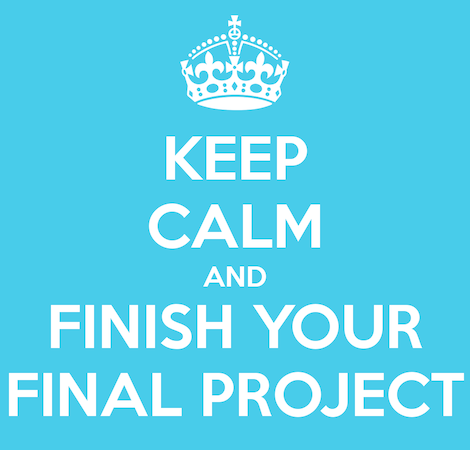

# Project milestones:

<p style="line-height:1.75;font-size:16px">
The work steps that have done to complete this task and predict the click target went throught the following action:

### Pre-Preprocessing
- Browsing the data
- Edit the timestamp column ('utc_time') and retype it to date time values
- Drop duplicate users
- Split the data to \<train, test\> by date to predict on the new data
    
### Preprocessing on train
- Browsing another details from the play_apps zip files
- Order train columns by the following questions:
        * How many rows and columns in data frame?
        * What is the columns type?
        * What is the max\min value for every feature?
        * Where there are missing values as NA?
        * How to deal with NaN values and which value should fill in?
        * What is the most important feature for modeling this data?
- Scaling the data<br>
- Balanced the data (balanced the data with model activation by boosting)<br>
    
### Run all this 'Preprocessing' action on the test
- Fit in the test data into the train table result template<br>
- Run all the actions for ordering this data without learning about the actual data
    
### Run models on the final \<train, test\> tables
- Split every table to X,y (columns and target)
- Run models on train and verifing on test by order:
        * LogisticRegression(max_iter=1000)
        * LogisticRegression(max_iter=1000, multi_class='multinomial')
        * DecisionTreeClassifier(random_state=0)
        * RandomForestClassifier(n_estimators=30)
        * DecisionTreeClassifier(random_state=0) with RFE
        * DecisionTreeClassifier(class_weight=[1, 10, 100, 1000])
        * LogisticRegression(class_weight='balanced')
        * DecisionTreeClassifier(class_weight='balanced')
        * RandomForestClassifier(n_estimators=1000, max_depth=3, class_weight='balanced')
        * RandomForestClassifier with RandomizedSearchCV for tuning hyperparameters
        * RandomForestClassifier with 'Oversampling', 'SMOTE','Undersampling'
- Verify by testing the result that:
        * model is not Overfitting (getting better results on train)
        * model is not Underfitting (getting bad result on both train and test)
        * tuning the hyperparameter in addition to get better results


# Pre-Preprocessing
## Browsing the data

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


## Edit the timestamp column ('utc_time') and retype it to date time values

<p style="line-height:1.75;font-size:16px">
Before any action, in order to split train-test by date, we should retyping 'utc_time' to date-time type.<br>
To do that we should encode 'utc_time' as local time by 'user_state'. <br>
We can use 'us' library to convert 'state code' up to 'time zone':

In [2]:
#!python -m pip install us

In [3]:
import us

data['time_zone'] = data["user_state"].apply(lambda state: us.states.lookup(state).time_zones[0])
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York


<p style="line-height:1.75;font-size:16px">
Now we can use 'Timestamp' method of pandas to apply local time by state figured from 'utc_time':

In [4]:
data['local_time'] = data.apply(lambda row: pd.Timestamp(row['utc_time'], unit='ms', tz=row['time_zone']), axis=1)

In [5]:
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York,2018-09-08 18:07:23.458000-04:00


## Drop duplicate users

<p style="line-height:1.75;font-size:16px">
The only manipulation we can perform on the data before exploring is this 2 changes:<br>
Drop duplicates of bidid. Also drop column 'marketplace'.<br>
We already know 'marketplace' column is constant and that there is some duplicated data of users.

In [6]:
data.drop(['marketplace'], axis=1, inplace=True)

In [7]:
data.sort_values(by=['bidid', 'click']).drop_duplicates(subset=['bidid'], keep='last', inplace=True)
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,0,America/New_York,2018-09-08 18:07:23.458000-04:00


## Split the data to \<train, test\> by date to predict on the new data

<p style="line-height:1.75;font-size:16px">
Seperating the data to < train , test > by time before exploring (avoiding learning any details on the test data)

In [8]:
data.sort_values(by=['local_time'])

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
571122,450a89d7-05b6-49b8-a330-3b1140a45632,1533578420974,com.kiloo.subwaysurf,NE,Verizon Wireless,NaN,NaN,8.0.0,1480,720,0,America/Chicago,2018-08-06 13:00:20.974000-05:00
584600,906bc987-e22b-4b3b-855a-bf07c48c131f,1533578427357,com.kiloo.subwaysurf,CT,Verizon Wireless,NaN,NaN,7.1.1,960,540,0,America/New_York,2018-08-06 14:00:27.357000-04:00
597313,c1ccc24f-7849-42b4-a177-40c9f675843d,1533578443707,com.kiloo.subwaysurf,CA,AT&T U-verse,NaN,NaN,7.1.1,960,540,0,America/Los_Angeles,2018-08-06 11:00:43.707000-07:00
597314,822fae69-f354-4ee1-830b-ebaa083643d6,1533578444037,com.gramgames.tenten,MI,Sprint PCS,NaN,NaN,8.0.0,1280,720,0,America/New_York,2018-08-06 14:00:44.037000-04:00
593662,e70fac8b-37f8-45d9-bcf8-2ff34a03a1a4,1533578448733,com.kiloo.subwaysurf,CA,AT&T Wireless,NaN,NaN,6.0.1,800,480,0,America/Los_Angeles,2018-08-06 11:00:48.733000-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280433,8dab0d6f-94a8-4946-83a5-543b9c399257,1542630279877,com.fivefpsgames.gta.grandgangcity,TX,AT&T Wireless,ZTE,Z718TL,6.0.1,480,800,0,America/Chicago,2018-11-19 06:24:39.877000-06:00
283701,090eff02-ff14-4838-83e2-f1f29b050713,1542630283308,com.mavis.slidey,CO,CenturyLink,LG,MP260,7.0,1280,720,0,America/Denver,2018-11-19 05:24:43.308000-07:00
286129,3b6629e8-7b67-4302-8f8b-c9ce6cd83689,1542630285833,br.com.tapps.zombieevolution,MI,T-Mobile USA,Samsung,SM-N920T,7.0,1920,1080,0,America/New_York,2018-11-19 07:24:45.833000-05:00
283702,ed9484b0-bc66-47ca-8c91-a04b278e4714,1542630287748,com.notabasement.mangarock.android.lotus,MD,Verizon Fios,Samsung,SM-J337A,8.0.0,1280,720,0,America/New_York,2018-11-19 07:24:47.748000-05:00


<p style="line-height:1.75;font-size:16px">
Seperator is 8 days back from the last 'local_time' leaving the test data to be the last 8 days

In [9]:
sprt_time = pd.Timestamp('2018-11-1 07:24:53.941000-05:00')
train = data[data['local_time'] <= sprt_time]
test = data[data['local_time'] > sprt_time]
train.sample(4)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
1172373,054b962d-41e6-4760-9891-857ff82ca7a2,1538671634267,toy.blast.pop.cubes.puzzle,MN,Mediacom Cable,Samsung,SM-J320V,7.1.1,1280,720,0,America/Chicago,2018-10-04 11:47:14.267000-05:00
2391200,5c6e9fc8-8b37-4920-a4ed-cd2c525fb890,1538665771324,br.com.tapps.bitcoininc,OR,Comcast Cable,Samsung,SM-G930R4,8.0.0,1920,1080,0,America/Los_Angeles,2018-10-04 08:09:31.324000-07:00
128067,8c8d3daa-bf60-4238-82e6-27ee789ff64b,1539543325029,com.kwalee.skiddycar,TX,T-Mobile USA,LG,TP260,7.0,1280,720,0,America/Chicago,2018-10-14 13:55:25.029000-05:00
2921305,4769a7f1-882a-4e04-8068-e18ea0a10c5e,1533878007025,com.mobilityware.spider,AZ,Verizon Wireless,NaN,NaN,7.0,2560,1440,0,America/Phoenix,2018-08-09 22:13:27.025000-07:00


In [10]:
print(len(train))
print(len(test))
print(f'Test DataFrame being {((len(test) / (len(data)))*100):.2f}% from all data')

2692110
456718
Test DataFrame being 14.50% from all data


# Preprocessing
## Order train columns
<p style="line-height:1.75;font-size:16px">
Understanding the data by figure out features and values

In [11]:
train.shape

(2692110, 13)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 287.5+ MB


<p style="line-height:1.75;font-size:16px">
As the 'info' shown, there are many features with type 'object'.<br>
To display the data about integers type features we can use 'describe':

In [13]:
train.describe()

,utc_time,device_height,device_width,click
count,2.692110e+06,2.692110e+06,2.692110e+06,2.692110e+06
mean,1.537738e+12,1.200772e+03,1.155966e+03,6.693003e-02
std,1.952719e+09,5.223336e+02,4.564782e+02,2.499008e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.536114e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.538090e+12,1.080000e+03,1.080000e+03,0.000000e+00
75%,1.539225e+12,1.280000e+03,1.280000e+03,0.000000e+00
max,1.541075e+12,3.120000e+03,3.120000e+03,1.000000e+00


<p style="line-height:1.75;font-size:16px">
As the 'describe' shown, 75% of 'click' featur is still 0 means not click.

<p style="line-height:1.75;font-size:16px">
We probably can drop columns with many missing values.<br>
We have 3 columns contain NA values:  user_isp, device_maker, device_model:

## Handle NaN values

In [14]:
train.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     937393
device_model     937247
device_osv            0
device_height         0
device_width          0
click                 0
time_zone             0
local_time            0
dtype: int64

<p style="line-height:1.75;font-size:16px">
To figure out the way we should handle this NaN values, most common, mean value or droping feature column, we should learn more about the affection of this features.<br>
Lets verify results for 'device_maker' and 'device_model': 

In [15]:
print(train.device_maker.value_counts(dropna=False))
print('\n'+'~'*40+'\n')
print(train.device_model.value_counts(dropna=False))

NaN           937393
Samsung       734606
LG            496035
Motorola      171454
ZTE           152701
               ...  
Smartfren          1
STF mobile         1
ECHO               1
Intex              1
i-Beast            1
Name: device_maker, Length: 248, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NaN           937247
SM-J327T1      77343
LM-X210(G)     76442
Moto E4        66293
MP260          55838
               ...  
GN9010             1
M50G               1
Y71                1
1801               1
ZE520KL            1
Name: device_model, Length: 2157, dtype: int64


device_maker values: 248
device_model values: 2157


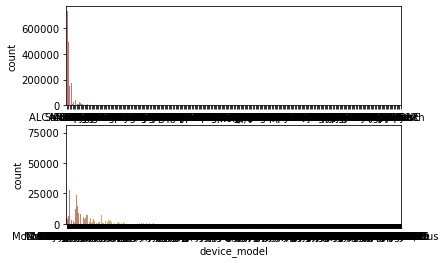

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 1)
sns.countplot(x='device_maker', data=train, palette='hls', ax=axes[0])
sns.countplot(x='device_model', data=train, palette='hls', ax=axes[1])

print(f'device_maker values: {len(pd.unique(train.device_maker))}')
print(f'device_model values: {len(pd.unique(train.device_model))}')

<p style="line-height:1.75;font-size:16px">
We can see there are many minor values apears only once or couple of times.<br>
'Samsung' is most common value by far (after NaN value). Before we fill all NA with value as 'Samsung', lets check how many options exist:

In [17]:
len(pd.unique(train.device_maker))

248

<p style="line-height:1.75;font-size:16px">
Since there are many values, and most of device_maker and device_model values is NaN (specially device_model), Specify the NaN values as most common value will be wrong.<br>
Lets see how many 'device_maker' single values:

In [18]:
dm_minor_values = train.device_maker.value_counts().value_counts()
dm_minor_values

1      51
2      22
3      15
4      12
6       7
       ..
127     1
475     1
133     1
43      1
66      1
Name: device_maker, Length: 98, dtype: int64

<AxesSubplot:>

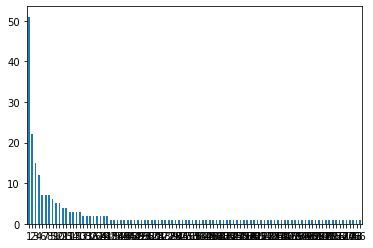

In [19]:
dm_minor_values.plot.bar(rot=0)

<p style="line-height:1.75;font-size:16px">
There are 51 single values, 20 duplicate value and go on.<br>
Lets try to union some values as type 'other' to simplify the data.
If we will union the values apears under 40 times we get 1416 items in category 'other' (that is mean our minor values decrease by 1416)

In [20]:
train.device_maker.value_counts().loc[lambda x: x < 40].sum()

1416

<p style="line-height:1.75;font-size:16px">
Increasing these threshold to 6000 (because union 1416 device_makers out is too little):

In [21]:
train.device_maker.value_counts().loc[lambda x: x < 6000].sum()

46080

<p style="line-height:1.75;font-size:16px">
If we want the device_maker feature to be learnable for the model and to be only 5 values, we can increase more this threshold up to 60000:

In [22]:
# (device_maker current values) - (device_maker values that apear below 60000 times)
len(pd.unique(train.device_maker)) - len(train.device_maker.value_counts().loc[lambda x: x < 60000])

5

In [23]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))

<ipython-input-23-9be5e9b3e06e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))


<AxesSubplot:xlabel='device_maker', ylabel='count'>

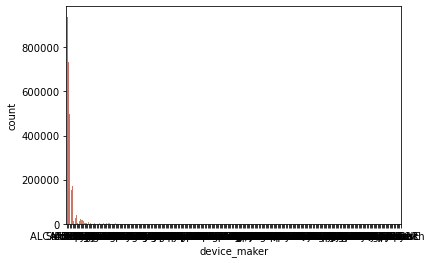

In [24]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
As we can see, NaN value now revalued as 'other' and nothing changed. <br>
Lets revalue all minor values (below 60000) to 'other':

In [25]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-25-42aa3fba5837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'


In [26]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

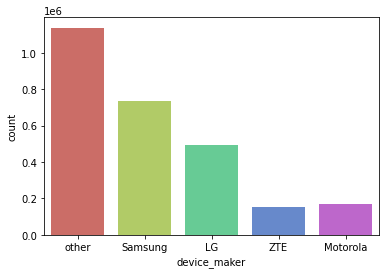

In [27]:
sns.countplot(x='device_maker', data=train, palette='hls')

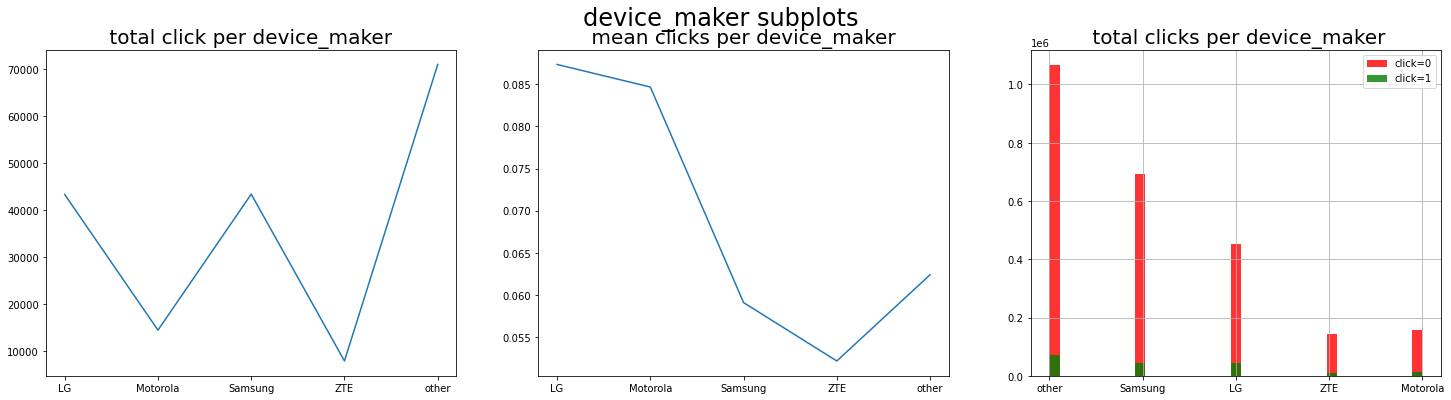

In [28]:
df = train
name = 'device_maker'

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle(f'{name} subplots', fontsize=24)
ax1.plot(df.groupby(name).agg({'click':'sum'}))
ax1.set_title(f' total click per {name} ', fontsize=20)
ax2.plot(df.groupby(name).agg({'click':'mean'}))
ax2.set_title(f' mean clicks per {name} ', fontsize=20)

plt.subplot(1, 3, 3)
plt.title(f' total clicks per {name}', fontsize=20);
#ax3.figure(figsize=(12, 10))
df[df["click"] == 0][name].hist(bins=35, color='red', label='click=0', alpha=0.8)
df[df["click"] == 1][name].hist(bins=35, color='green', label='click=1', alpha=0.8)
plt.legend()

<p style="line-height:1.75;font-size:16px">
Tring to map if there is some connection for clicking by having specific device_maker we can plot the % of clicking from all users and see if there is interesting results:

                 click
device_maker          
LG            0.087355
Motorola      0.084676
Samsung       0.059089
ZTE           0.052161
other         0.062394


<AxesSubplot:xlabel='device_maker'>

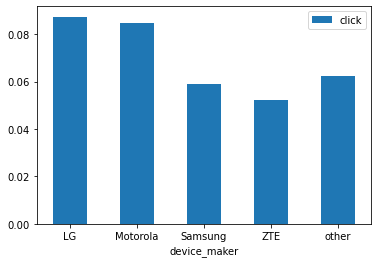

In [29]:
click_per_dm = df.groupby('device_maker').agg({'click':'mean'})
print(click_per_dm)
(click_per_dm).plot.bar(rot=0)

<p style="line-height:1.75;font-size:16px">
The differences are minor, 'LG' is the most "clicker" value in this feature.<br>
We shouldn't drop these feature up to model, since there is connection to "click" propability.<br>

<p style="line-height:1.75;font-size:16px">
Lets look a bit on column named 'user_isp':

In [30]:
train.user_isp.value_counts(dropna=False).head(10)

T-Mobile USA          612604
Spectrum              326911
Comcast Cable         288505
AT&T Wireless         283737
Verizon Wireless      240321
Sprint PCS            225568
AT&T U-verse          159456
Cox Communications     67054
CenturyLink            61756
Verizon Fios           39728
Name: user_isp, dtype: int64

In [31]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
# Choosing this number for plotting
def user_isp_feature(first_user_ip_values = 7):
    print(f'The first {first_user_ip_values} values of these feature is {((train.user_isp.value_counts(dropna=False).head(first_user_ip_values).values.sum()) / train.user_isp.value_counts(dropna=False).values.sum())*100:.2f}% from all values')

interact(user_isp_feature, first_user_ip_values=(1,15,1));

#### The first 7 values of these feature is 79.38% from all values

In [ ]:
def plot_user_isp(first_user_ip_values = 7):
    df = train
    name = 'user_isp'

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
    fig.suptitle(f'{name} subplots', fontsize=24)
    ax1.plot(df.groupby(name).agg({'click':'sum'}).head(first_user_ip_values+1))
    ax1.set_title(f' total click per {name} ', fontsize=20)
    ax1.axhline(y=df.groupby(name).agg({'click':'sum'}).mean()[0], color='r', linestyle='--')

    ax2.plot(df.groupby(name).agg({'click':'mean'}).head(first_user_ip_values+1))
    ax2.set_title(f' mean clicks per {name} ', fontsize=20)
    ax2.axhline(y=df.groupby(name).agg({'click':'mean'}).mean()[0], color='r', linestyle='--')

interact(plot_user_isp, first_user_ip_values=(1,15,1));

<p style="line-height:1.75;font-size:16px">
We can not see any correlation between this column clicks and the global propability, so lets drop this column:

In [34]:
train.groupby('user_isp').agg({'click':'mean'}).mean()

click    0.043483
dtype: float64

In [35]:
train.drop(['user_isp'], axis=1, inplace=True)

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   device_maker   object
 5   device_model   object
 6   device_osv     object
 7   device_height  int64 
 8   device_width   int64 
 9   click          int64 
 10  time_zone      object
 11  local_time     object
dtypes: int64(4), object(8)
memory usage: 267.0+ MB


<p style="line-height:1.75;font-size:16px">
Now we can drop the 'bidid' column since Index is also unique.<br>
Also we can reorder the columns 'device_height' and 'device_width' as one column named 'device_size'.<br>
We can drop the 'user_state', 'time_zone' and 'utc_time' columns - a reference for this values we can find in local_time values.<br>
We can drop 'device_model' column, most of the values are NaN.

In [37]:
train['device_size'] = train['device_height'] * train['device_width']
train.drop(['bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model'], axis=1, inplace=True)
train.sample(4)

<ipython-input-37-6e175e4f2f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size'] = train['device_height'] * train['device_width']


,app_id,device_maker,device_osv,click,local_time,device_size
2733178,com.chilligames.lastepic.fortnight.battle.sayn...,Samsung,8.0.0,0,2018-09-20 19:04:24.546000-04:00,921600
2428048,com.fag.virtual.dad.simulator.happy.virtual.fa...,LG,7.0,0,2018-10-27 18:03:43.785000-04:00,2073600
3122109,org.cocos2dx.wordsoup,LG,6.0.1,0,2018-09-20 14:29:27.536000-05:00,2073600
450909,net.playwithworld.farkle.dice.android,LG,7.0,0,2018-10-07 22:43:53.839000-07:00,921600


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692110 entries, 0 to 3148818
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        object
 1   device_maker  object
 2   device_osv    object
 3   click         int64 
 4   local_time    object
 5   device_size   int64 
dtypes: int64(2), object(4)
memory usage: 143.8+ MB


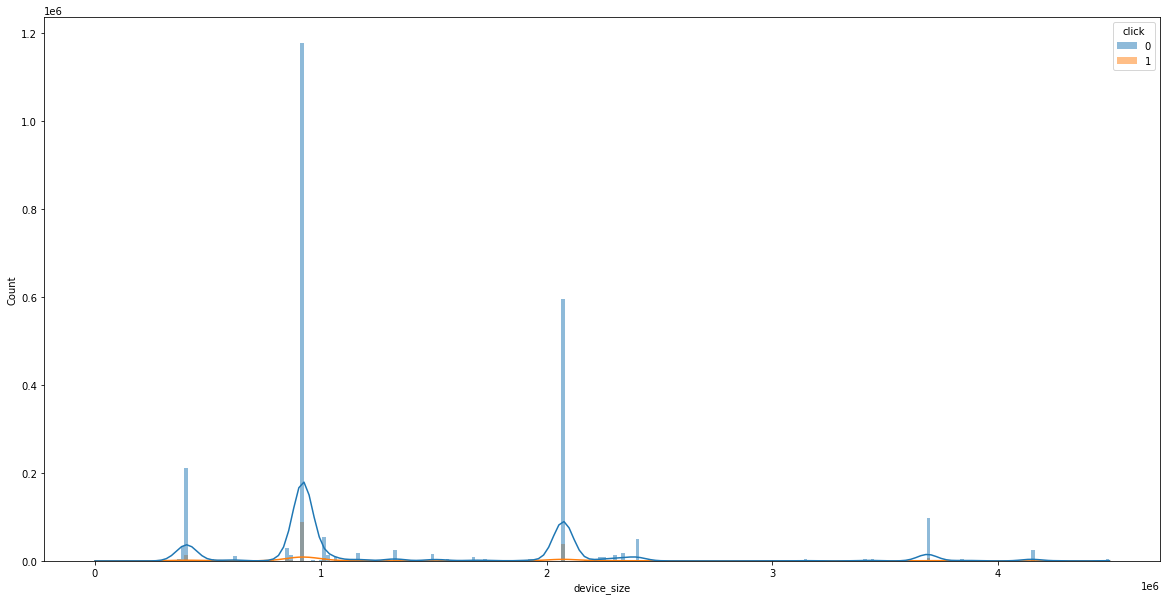

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='device_size', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

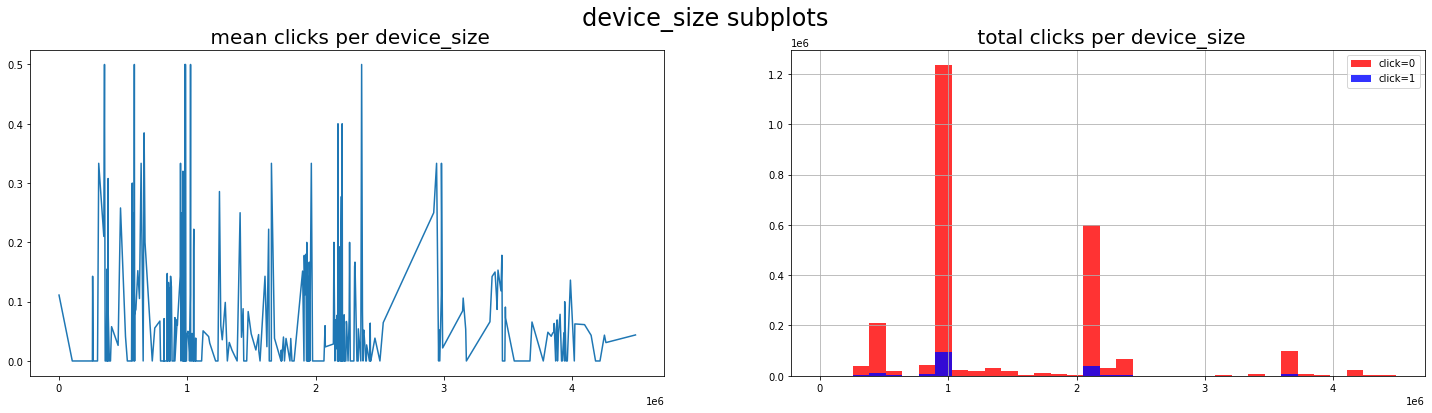

In [40]:
df = train
name = 'device_size'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
fig.suptitle(f'{name} subplots', fontsize=24)
ax1.plot(df.groupby(name).agg({'click':'mean'}))
ax1.set_title(f' mean clicks per {name}', fontsize=20)

plt.subplot(1, 2, 2)
plt.title(f' total clicks per {name}', fontsize=20);
#ax3.figure(figsize=(12, 10))
df[df["click"] == 0][name].hist(bins=35, color='red', label='click=0', alpha=0.8)
df[df["click"] == 1][name].hist(bins=35, color='blue', label='click=1', alpha=0.8)
plt.legend() 

<p style="line-height:1.75;font-size:16px">
We can see that we can generaly split this data into 2 classes: smaller than 1.5 and bigger:

In [41]:
train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
train.drop(['device_size'], axis=1, inplace=True)

<ipython-input-41-96e7138a25ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
train.head()

,app_id,device_maker,device_osv,click,local_time,device_size_bigger_1.5
0,com.OppanaGames.CarSim,other,7.0,0,2018-09-08 17:05:31.894000-05:00,1
1,com.mobilityware.CrownSolitaire,other,7.0,0,2018-09-08 17:06:03.932000-05:00,1
2,com.kuttigames.tenkyurollball,other,7.1.1,0,2018-09-08 17:06:26.908000-05:00,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,other,6.0.1,0,2018-09-08 17:06:45.023000-05:00,1
4,com.landslab.my3rdgrademathgames,other,7.1.1,0,2018-09-08 18:07:23.458000-04:00,1


<p style="line-height:1.75;font-size:16px">
Lets plot if data is imbalanced (we already know it is):

<AxesSubplot:xlabel='click', ylabel='count'>

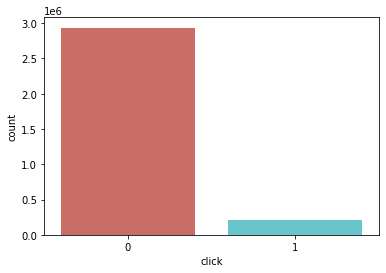

In [43]:
sns.countplot(x='click', data=data, palette='hls')

In [44]:
# print % of clicks
clickRate = df['click'].value_counts()/len(df)*100
print(clickRate)
print(f'\n{clickRate.values[0]:.2f}% of the users did not clicked. {clickRate.values[1]:.2f}% of the users clicked')

0    93.306997
1     6.693003
Name: click, dtype: float64

93.31% of the users did not clicked. 6.69% of the users clicked


## Browsing another details from the play_apps zip files
<p style="line-height:1.75;font-size:16px">
Pull up applications data from zip files:

<p style="line-height:1.75;font-size:16px">
learn the zip API:

In [45]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app['app_id'], app['category'], app['score']

('a008.com.fc2.blog.androidkaihatu.datecamera2', ['PHOTOGRAPHY'], '4.0')

In [46]:
apps = data['app_id'].unique().tolist()
len(apps)

14869

<p style="line-height:1.75;font-size:16px">
Trying to apply the app values for each row in train data but it takes too long:

In [47]:
'''
### THIS IS TAKING TOO LONG ###
columns = ['app_id','category','score','reviews','editors_choice','free']

count = 0
for index, row in train.iterrows():
    try:
        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))
        if row['app_id'] != app['app_id']:
            continue
        else:
            for c in columns:
                row[c] = app[c]
            # if there is more than one category, leave one only
            row['category'] = row['category'][0]
            count += 1
    except:
        for c in columns:
                row[c] = None

print(count)
train
'''

"\n### THIS IS TAKING TOO LONG ###\ncolumns = ['app_id','category','score','reviews','editors_choice','free']\n\ncount = 0\nfor index, row in train.iterrows():\n    try:\n        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))\n        if row['app_id'] != app['app_id']:\n            continue\n        else:\n            for c in columns:\n                row[c] = app[c]\n            # if there is more than one category, leave one only\n            row['category'] = row['category'][0]\n            count += 1\n    except:\n        for c in columns:\n                row[c] = None\n\nprint(count)\ntrain\n"

<p style="line-height:1.75;font-size:16px">
Alternative function is to make another table with the apps details and join it:

In [48]:
columns = ['app_id','category','score','reviews','editors_choice','free']

In [49]:
def get_app_data(app_name):
    row = {}
    try:
        app = pickle.loads(app_details.read('play_apps/' + app_name))
        for c in columns:
            row[c] = app[c]
        # if there is more than one category, leave one only
        row['category'] = row['category'][0]
    except:
        for c in columns:
                row[c] = 'None'
    return row

In [50]:
get_app_data('com.OppanaGames.CarSim')

{'app_id': 'com.OppanaGames.CarSim',
 'category': 'GAME_SIMULATION',
 'score': '4.3',
 'reviews': 155129,
 'editors_choice': False,
 'free': True}

In [51]:
apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))

apps_list

[{'app_id': 'com.OppanaGames.CarSim',
  'category': 'GAME_SIMULATION',
  'score': '4.3',
  'reviews': 155129,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.mobilityware.CrownSolitaire',
  'category': 'GAME_CARD',
  'score': '4.7',
  'reviews': 11927,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kuttigames.tenkyurollball',
  'category': 'GAME_ARCADE',
  'score': '4.1',
  'reviews': 178,
  'editors_choice': False,
  'free': True},
 {'app_id': 'None',
  'category': 'None',
  'score': 'None',
  'reviews': 'None',
  'editors_choice': 'None',
  'free': 'None'},
 {'app_id': 'com.landslab.my3rdgrademathgames',
  'category': 'GAME_EDUCATIONAL',
  'score': '3.6',
  'reviews': 35,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kick.trucks.manual.shift.driving',
  'category': 'GAME_SIMULATION',
  'score': '3.6',
  'reviews': 3891,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.slots.realvegas2',
  'category': 'GAME_CASINO',
  'score': '4.7

<p style="line-height:1.75;font-size:16px">
Make this list as DataFrame so we could join it to our train table:

In [52]:
apps_df = pd.DataFrame(apps_list)
apps_df

,app_id,category,score,reviews,editors_choice,free
0,com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
1,com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
2,com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
3,None,None,None,None,None,None
4,com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...,...
14864,None,None,None,None,None,None
14865,None,None,None,None,None,None
14866,None,None,None,None,None,None
14867,None,None,None,None,None,None


In [53]:
train.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

train = train.join(apps_df)

In [54]:
train.reset_index(inplace=True)
train.head()

,app_id,device_maker,device_osv,click,local_time,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,Ibtikar.Applications.Ibaloot,Samsung,8.0.0,0,2018-10-14 12:02:11.214000-04:00,1,GAME_CARD,4.0,53660,False,True
1,Ibtikar.Applications.Ibaloot,Samsung,7.0,0,2018-09-20 08:01:05.440000-05:00,1,GAME_CARD,4.0,53660,False,True
2,Ibtikar.Applications.Ibaloot,other,8.0.0,0,2018-08-17 01:13:32.953000-04:00,1,GAME_CARD,4.0,53660,False,True
3,Ibtikar.Applications.Ibaloot,other,7.0,0,2018-08-28 12:45:35.421000-07:00,1,GAME_CARD,4.0,53660,False,True
4,abc.FeetlyDash,other,7.1.1,0,2018-08-18 07:59:48.022000-04:00,1,NaN,NaN,NaN,NaN,NaN


In [55]:
train.isna().sum()

app_id                         0
device_maker                   0
device_osv                     0
click                          0
local_time                     0
device_size_bigger_1.5         0
category                  231608
score                     236425
reviews                   231608
editors_choice            231608
free                      231608
dtype: int64

In [56]:
# fill NaN values and typing the columns
train.category.fillna('other', inplace=True)

train.score.fillna(0, inplace=True)
train.score = train.score.astype(float)

train.reviews.fillna(0, inplace=True)
train.reviews = train.reviews.astype(float)

train.editors_choice.fillna(False, inplace=True)
train.editors_choice = train.editors_choice.astype(int)

train.free.fillna(False, inplace=True)
train.free = train.free.astype(int)

In [57]:
train.isna().sum()

app_id                    0
device_maker              0
device_osv                0
click                     0
local_time                0
device_size_bigger_1.5    0
category                  0
score                     0
reviews                   0
editors_choice            0
free                      0
dtype: int64

<p style="line-height:1.75;font-size:16px">
Now lets look at the 'local_time' feature, we can refine this values into details (month, weekday, hour)

Text(0.5, 0, 'local_time')

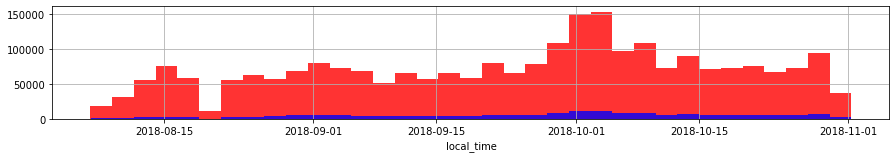

In [58]:
column='local_time'
df = train

plt.figure(figsize=(15, 12))
plt.subplot(5, 1, 1)
df[df["click"] == 0][column].hist(bins=35, color='red', label='click=0', alpha=0.8)
df[df["click"] == 1][column].hist(bins=35, color='blue', label='click=1', alpha=0.8)
plt.xlabel(column)

<p style="line-height:1.75;font-size:16px">
It seems that over that timeline, month is taking a large part of the propability to click on an Ad

In [59]:
train['month'] = train.apply(lambda row: row.local_time.month, axis = 1)
train['hour'] = train.apply(lambda row: row.local_time.hour, axis = 1)
train['weekday'] = train.apply(lambda row: row.local_time.strftime('%w'), axis = 1)

train.drop(['local_time'], axis=1, inplace=True)

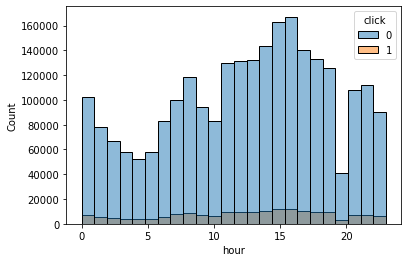

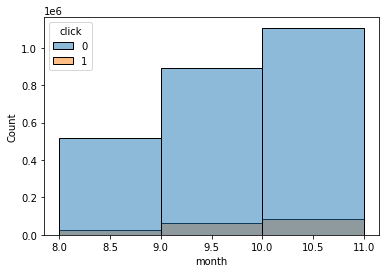

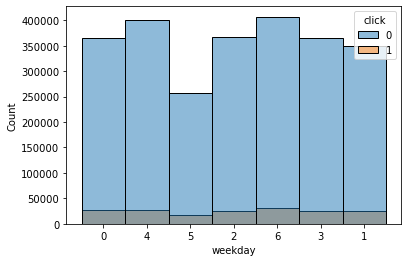

In [60]:
sns.histplot(data=train, x='hour', hue='click', bins=24)
plt.show()
sns.histplot(data=train, x='month', hue='click', bins=3)
plt.show()
sns.histplot(data=train, x='weekday', hue='click')
plt.show()

<p style="line-height:1.75;font-size:16px">
One of the problem of plotting such as imbalaced data is that it is difficult to specify the pick of 'click' in every category.<br>
Lets try to plot the % of the clicks out of all users in every time category:

<AxesSubplot:xlabel='weekday'>

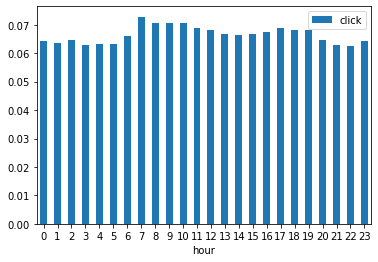

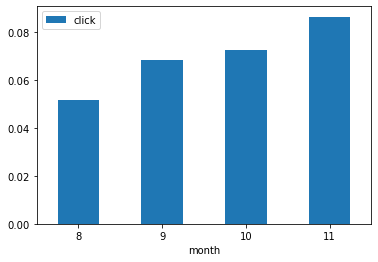

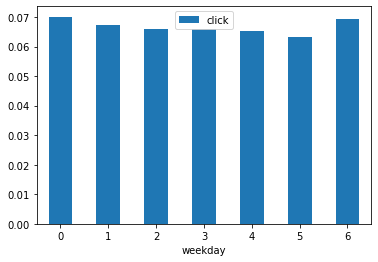

In [61]:
click_per_hour = df.groupby('hour').agg({'click':'mean'})
(click_per_hour).plot.bar(rot=0)
click_per_month = df.groupby('month').agg({'click':'mean'})
(click_per_month).plot.bar(rot=0)
click_per_weekday = df.groupby('weekday').agg({'click':'mean'})
(click_per_weekday).plot.bar(rot=0)

<p style="line-height:1.75;font-size:16px">
Lets try to plot the % of the clicks in free / non free apps:

<AxesSubplot:xlabel='free'>

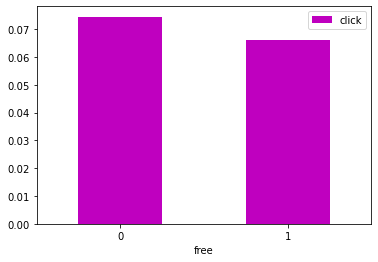

In [62]:
click_per_free = df.groupby('free').agg({'click':'mean'})
(click_per_free).plot.bar(rot=0, color='m')

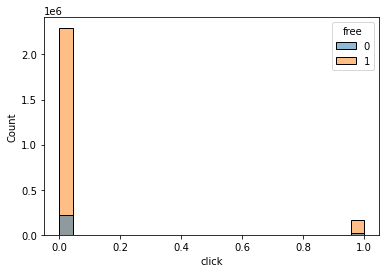

In [63]:
sns.histplot(x='click', hue="free", stat='count', data=train)
 
# Show the plot
plt.show()

In [64]:
train.category.value_counts(dropna=False)

GAME_CARD              385605
GAME_PUZZLE            299616
GAME_ACTION            257231
GAME_CASINO            245771
GAME_ARCADE            242876
other                  231608
GAME_SIMULATION        209716
GAME_CASUAL            182348
GAME_BOARD             116736
GAME_RACING            101258
GAME_WORD               93714
GAME_ADVENTURE          58179
GAME_SPORTS             53368
GAME_ROLE_PLAYING       52128
GAME_EDUCATIONAL        36508
ENTERTAINMENT           32599
GAME_STRATEGY           18309
EDUCATION               15745
PERSONALIZATION         15574
GAME_TRIVIA              6355
MUSIC_AND_AUDIO          6330
LIBRARIES_AND_DEMO       4089
PRODUCTIVITY             3765
TOOLS                    3714
GAME_MUSIC               3649
SOCIAL                   3477
COMICS                   2089
AUTO_AND_VEHICLES        1805
SPORTS                   1500
PHOTOGRAPHY              1297
LIFESTYLE                 846
BOOKS_AND_REFERENCE       737
BEAUTY                    717
ART_AND_DE

In [65]:
train['category'].loc[train['category'].value_counts()[train['category']].values < 2000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [66]:
train.category.value_counts(dropna=False)

GAME_CARD             385605
GAME_PUZZLE           299616
GAME_ACTION           257231
GAME_CASINO           245771
GAME_ARCADE           242876
other                 241361
GAME_SIMULATION       209716
GAME_CASUAL           182348
GAME_BOARD            116736
GAME_RACING           101258
GAME_WORD              93714
GAME_ADVENTURE         58179
GAME_SPORTS            53368
GAME_ROLE_PLAYING      52128
GAME_EDUCATIONAL       36508
ENTERTAINMENT          32599
GAME_STRATEGY          18309
EDUCATION              15745
PERSONALIZATION        15574
GAME_TRIVIA             6355
MUSIC_AND_AUDIO         6330
LIBRARIES_AND_DEMO      4089
PRODUCTIVITY            3765
TOOLS                   3714
GAME_MUSIC              3649
SOCIAL                  3477
COMICS                  2089
Name: category, dtype: int64

<AxesSubplot:xlabel='category'>

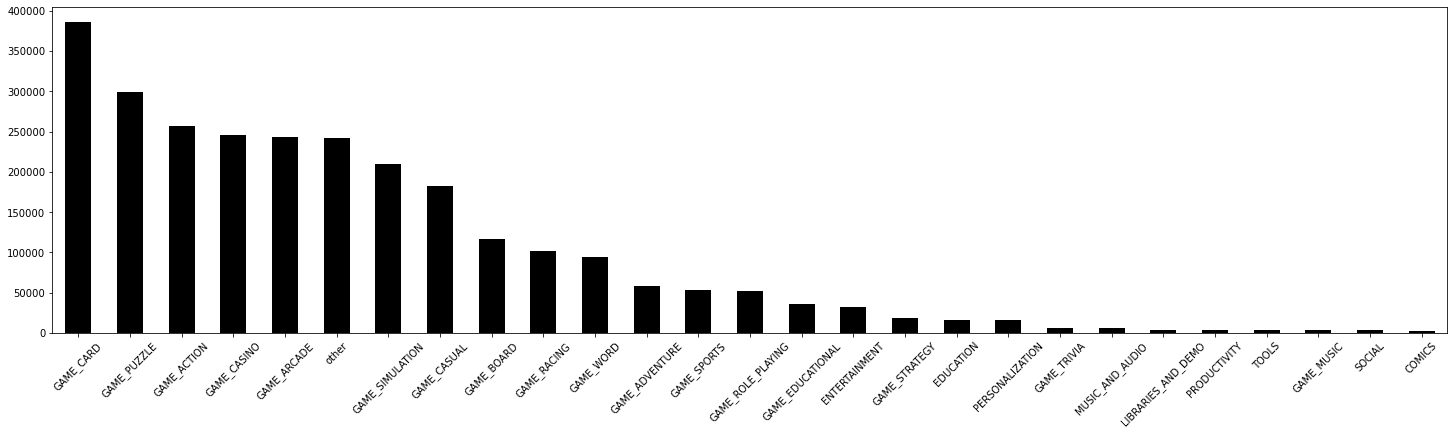

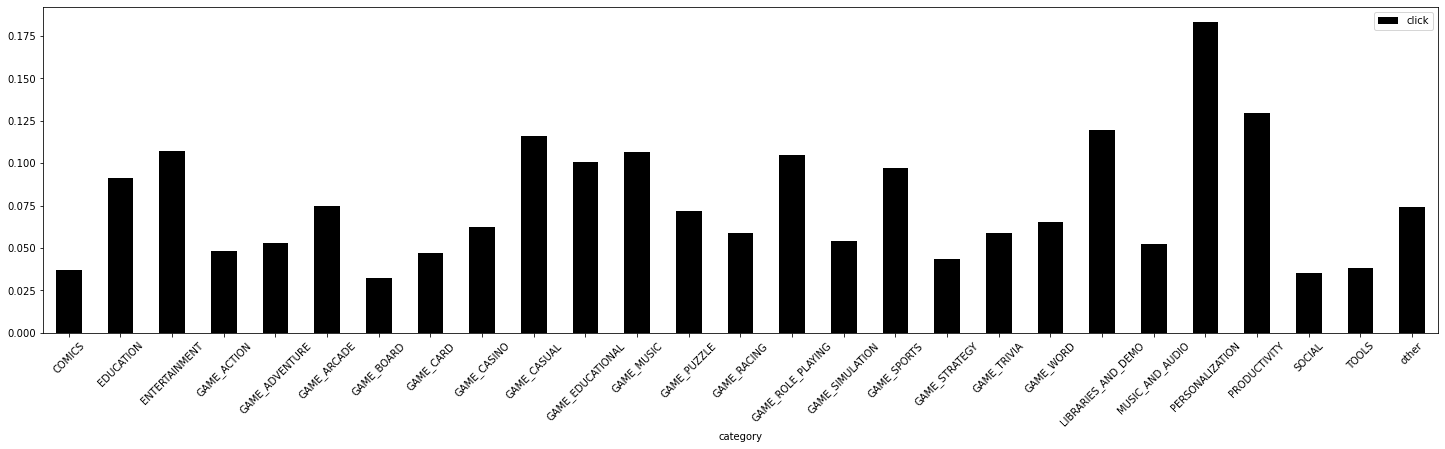

In [67]:
plt.figure(figsize=(25,6))
train.category.value_counts(dropna=False).plot.bar(rot=45, color='k')
train.groupby('category').agg({'click':'mean'}).plot.bar(rot=45, color='k', figsize=(25,6))

Text(0.5, 1.0, ' mean clicks per category ')

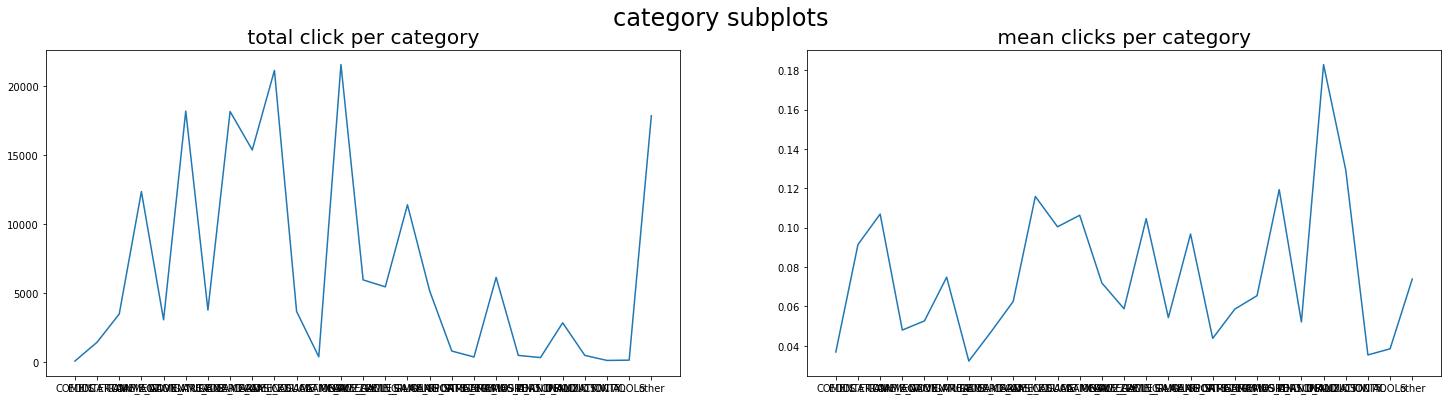

In [68]:
column = 'category'
df = train

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
fig.suptitle(f'{column} subplots', fontsize=24)
ax1.plot(df.groupby(column).agg({'click':'sum'}))
ax1.set_title(f' total click per {column} ', fontsize=20)
ax2.plot(df.groupby(column).agg({'click':'mean'}))
ax2.set_title(f' mean clicks per {column} ', fontsize=20)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692110 entries, 0 to 2692109
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   app_id                  object 
 1   device_maker            object 
 2   device_osv              object 
 3   click                   int64  
 4   device_size_bigger_1.5  int64  
 5   category                object 
 6   score                   float64
 7   reviews                 float64
 8   editors_choice          int32  
 9   free                    int32  
 10  month                   int64  
 11  hour                    int64  
 12  weekday                 object 
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 246.5+ MB


In [70]:
train.device_osv.value_counts(dropna=False)

7.0                                             921321
8.0.0                                           544845
6.0.1                                           465716
7.1.1                                           464410
7.1.2                                           150409
8.1.0                                            70594
6.0                                              55277
9                                                19433
7.1                                                 59
P                                                   20
8.0                                                  7
6.1                                                  5
CONTIXO-LA703-20180915-v1.0                          5
M                                                    4
5.0 by mrkindaiji                                    2
4.4.4 KitKat Os For 9inch QuadCore Tablet Pc         1
unknown                                              1
7.0.1                                                1
Name: devi

<AxesSubplot:xlabel='device_osv'>

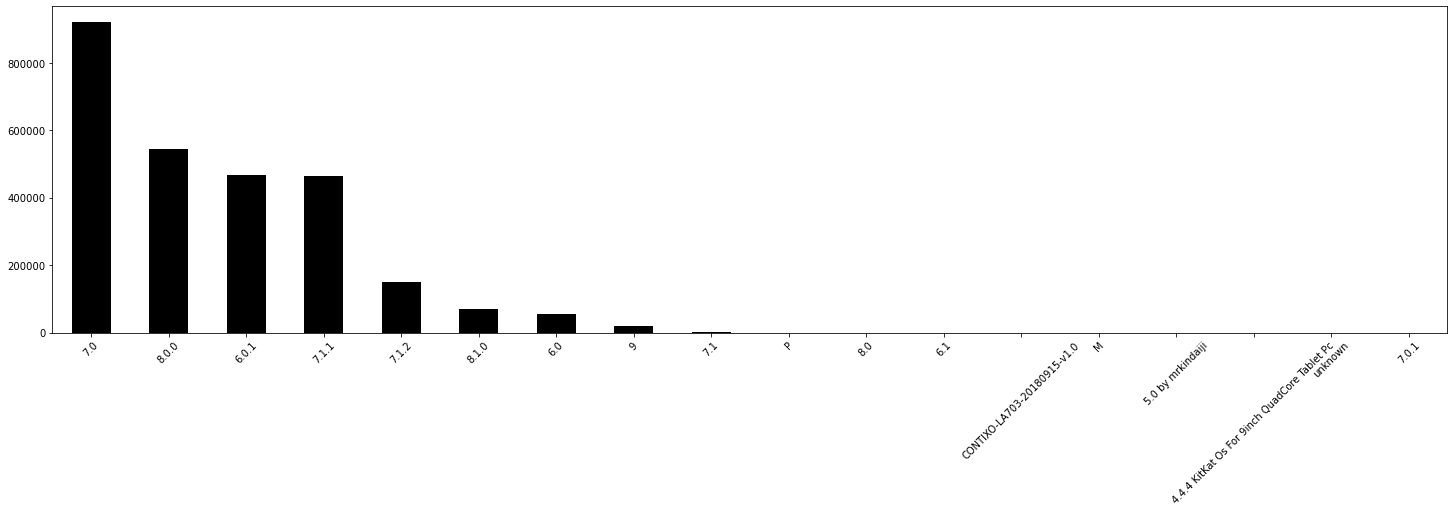

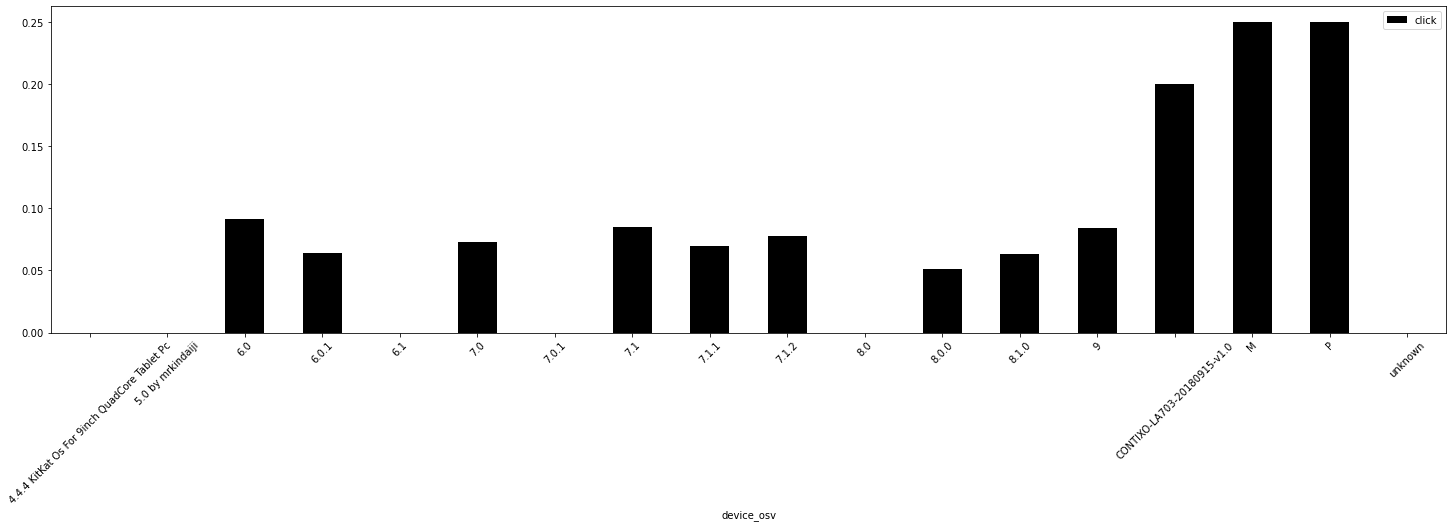

In [71]:
plt.figure(figsize=(25,6))
train.device_osv.value_counts(dropna=False).plot.bar(rot=45, color='k')
train.groupby('device_osv').agg({'click':'mean'}).plot.bar(rot=45, color='k', figsize=(25,6))

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['device_osv'])
train['device_osv'] = le.transform(train['device_osv'])

In [73]:
train.drop(['app_id', 'month', 'hour', 'weekday'], axis=1, inplace=True)

## Scaling the data

In [74]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
cols = ['reviews', 'score']
train[cols] = scaler.fit_transform(train[cols])

## Get dummies

In [75]:
cat_vars = ['device_maker', 'category']
train = pd.concat([train.drop(cat_vars, axis=1), pd.get_dummies(train[cat_vars])], axis=1)

# Run all this 'Preprocessing' action on the test
## Fit in the test data into the train table result template

In [76]:
columns = ['app_id','category','score','reviews','editors_choice','free']

apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))
apps_df = pd.DataFrame(apps_list)

test.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

apps_df

,category,score,reviews,editors_choice,free
app_id,,,,,
com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
None,None,None,None,None,None
com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...
None,None,None,None,None,None
None,None,None,None,None,None
None,None,None,None,None,None


In [77]:
# device_maker
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
test['device_maker'].loc[test['device_maker'].value_counts()[test['device_maker']].values < 60000] = 'other'

# device_size
test['device_size'] = test['device_height'] * test['device_width']
test['device_size_bigger_1.5'] = test['device_size'].apply(lambda size : 1 if size > 1.5 else 0)

# add data from zip files
test = test.join(apps_df)
test.reset_index(inplace=True)

<ipython-input-77-54ad98c7c1fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-77-54ad98c7c1fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [78]:
# category
test.category.fillna('other', inplace=True)
test['category'].loc[test['category'].value_counts()[test['category']].values < 2000] = 'other'

# editor_choice
test.editors_choice.fillna(False, inplace=True)
test.editors_choice = test.editors_choice.astype(int)

# free
test.free.fillna(False, inplace=True)
test.free = test.free.astype(int)

# device_osv encoding
le = LabelEncoder()
le.fit(test['device_osv'])
test['device_osv'] = le.transform(test['device_osv'])

test

,app_id,bidid,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time,device_size,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356997801,MS,CSpire Wireless,LG,AS998,4,1440,2880,1,America/Chicago,2018-11-04 12:43:17.801000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
1,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356824978,MS,CSpire Wireless,LG,AS998,4,1440,2880,0,America/Chicago,2018-11-04 12:40:24.978000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
2,abc.kids.preschool.learning.phonics.songs.videos,5dcbd3cf-4e75-425e-b1d7-6f8c77779d33,1542248281587,TX,T-Mobile USA,other,A574BL,3,480,854,0,America/Chicago,2018-11-14 20:18:01.587000-06:00,409920,1,EDUCATION,4.4,1371,0,1
3,abc.kids.preschool.learning.phonics.songs.videos,f372410c-3679-4735-8937-cdfcb8439e26,1542258853122,IL,Sprint PCS,Samsung,SM-J727P,2,720,1280,0,America/Chicago,2018-11-14 23:14:13.122000-06:00,921600,1,EDUCATION,4.4,1371,0,1
4,abc.kids.preschool.learning.phonics.songs.videos,5d3e5037-1f9c-4164-98ad-255990304e7c,1541696587641,IL,AT&T Wireless,LG,LM-X210(G),4,1280,720,0,America/Chicago,2018-11-08 11:03:07.641000-06:00,921600,1,EDUCATION,4.4,1371,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456713,zaycev.fm,1031fe85-6050-4d03-a505-8726e13003c3,1541949845672,WI,Verizon Wireless,Samsung,SM-G928V,2,1920,1080,0,America/Chicago,2018-11-11 09:24:05.672000-06:00,2073600,1,other,4.5,21618,0,1
456714,zaycev.fm,49c987ef-3521-40a8-baa2-51057ba7b6aa,1541457484811,MN,T-Mobile USA,LG,H901,2,2560,1440,0,America/Chicago,2018-11-05 16:38:04.811000-06:00,3686400,1,other,4.5,21618,0,1
456715,zaycev.fm,79daab48-5d41-46e6-ad63-e6ddaa9f05c0,1542204652158,NY,Sprint PCS,Samsung,SM-G935P,6,1920,1080,0,America/New_York,2018-11-14 09:10:52.158000-05:00,2073600,1,other,4.5,21618,0,1
456716,zebi24.guess_5,3b9565c0-96f3-4d6d-8975-32b3667eeea1,1541096622211,MD,Verizon Wireless,LG,L84VL,4,1280,720,0,America/New_York,2018-11-01 14:23:42.211000-04:00,921600,1,other,4.1,969,0,1


In [79]:
# score
test.score.fillna(0, inplace=True)
test.score = test.score.astype(float)

# reviews
test.reviews.fillna(0, inplace=True)
test.reviews = test.reviews.astype(float)

# scaling
cols = ['reviews', 'score']
test[cols] = scaler.fit_transform(test[cols])

# get_dummies
cat_vars = ['device_maker', 'category']
test = pd.concat([test.drop(cat_vars, axis=1), pd.get_dummies(test[cat_vars])], axis=1)

In [80]:
test.drop(['device_size', 'bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model','user_isp','local_time','app_id'], axis=1, inplace=True)

## Split every table to X,y (columns and target)

In [81]:
X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']

#### Comparing X_train and X_test column to find diff before running models:

In [82]:
X_train

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Motorola,device_maker_Samsung,device_maker_ZTE,...,category_GAME_STRATEGY,category_GAME_TRIVIA,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_MUSIC_AND_AUDIO,category_PERSONALIZATION,category_PRODUCTIVITY,category_SOCIAL,category_TOOLS,category_other
0,11,1,-1.00,0.221154,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,-1.00,0.221154,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11,1,-1.00,0.221154,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,-1.00,0.221154,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,-11.00,-0.224091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692105,8,1,-11.00,-0.224091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692106,5,1,-11.00,-0.224091,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692107,5,1,-11.00,-0.224091,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2692108,8,1,-11.00,-0.224091,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [83]:
X_test

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Samsung,device_maker_other,category_EDUCATION,...,category_GAME_MUSIC,category_GAME_PUZZLE,category_GAME_RACING,category_GAME_ROLE_PLAYING,category_GAME_SIMULATION,category_GAME_SPORTS,category_GAME_STRATEGY,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_other
0,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0.285714,-0.127704,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0.285714,-0.127704,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0.285714,-0.127704,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456713,2,1,0.428571,0.375140,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
456714,2,1,0.428571,0.375140,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
456715,6,1,0.428571,0.375140,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
456716,4,1,-0.142857,-0.137688,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### We can see that X_train columns number is 38 and test is 29 (becouse in train there is more values of category)

In [84]:
diff = list(set(X_train.columns) - set(X_test.columns))
diff

['category_SOCIAL',
 'category_PRODUCTIVITY',
 'category_TOOLS',
 'category_MUSIC_AND_AUDIO',
 'device_maker_ZTE',
 'device_maker_Motorola',
 'category_COMICS',
 'category_PERSONALIZATION',
 'category_GAME_TRIVIA']

In [85]:
for category in diff:
    X_test[category] = 0

# Run models on the final \<train, test\> tables
### LogisticRegression(max_iter=1000)

In [86]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

def show_classifier_results(clf):
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Precision score: {precision_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test, y_pred)}')

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
show_classifier_results(lr)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### We can tell that this model choose for every user 'not-clicked' and actually right in 93% of the data and recall is 1 which is impressive. Lets define LogisticRegression with multinominal:

### LogisticRegression(max_iter=1000, multi_class='multinomial')

In [89]:
lrmc = LogisticRegression(multi_class='multinomial', max_iter=1000)
lrmc.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [90]:
show_classifier_results(lrmc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier(random_state=0)

In [91]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [92]:
show_classifier_results(dtc)

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestClassifier(n_estimators=30)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

#### RandomForestClassifier got the mistake and now we can see our results getting better:

In [94]:
show_classifier_results(rf_clf)

[[423506    196]
 [ 32998     18]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.08      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.51      0.50      0.48    456718
weighted avg       0.87      0.93      0.89    456718

Precision score: 0.08411214953271028
Recall score: 0.0005451902108068815


In [95]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X_train.loc[:, rfe_support].columns.tolist()
rfe_features

Fitting estimator with 38 features.


['device_osv',
 'score',
 'reviews',
 'editors_choice',
 'free',
 'device_maker_LG',
 'device_maker_Motorola',
 'device_maker_Samsung',
 'device_maker_ZTE',
 'device_maker_other',
 'category_EDUCATION',
 'category_ENTERTAINMENT',
 'category_GAME_ACTION',
 'category_GAME_ADVENTURE',
 'category_GAME_ARCADE',
 'category_GAME_BOARD',
 'category_GAME_CARD',
 'category_GAME_CASINO',
 'category_GAME_CASUAL',
 'category_GAME_EDUCATIONAL',
 'category_GAME_MUSIC',
 'category_GAME_PUZZLE',
 'category_GAME_RACING',
 'category_GAME_ROLE_PLAYING',
 'category_GAME_SIMULATION',
 'category_GAME_SPORTS',
 'category_GAME_STRATEGY',
 'category_GAME_WORD',
 'category_PERSONALIZATION',
 'category_other']

In [96]:
rfe = DecisionTreeClassifier(random_state=0)
rfe.fit(X_train[rfe_features],y_train)

DecisionTreeClassifier(random_state=0)

In [97]:
y_pred = rfe.predict(X_test[rfe_features])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

[[423302    400]
 [ 32989     27]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.06      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.50      0.50      0.48    456718
weighted avg       0.87      0.93      0.89    456718

Precision score: 0.06323185011709602
Recall score: 0.0008177853162103223


In [98]:
rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50, step=10)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X_train.loc[:, rfe_support].columns.tolist()

rfe_50 = DecisionTreeClassifier(random_state=0)

rfe_50.fit(X_train[rfe_features],y_train)

DecisionTreeClassifier(random_state=0)

In [99]:
y_pred = rfe_50.predict(X_test[rfe_features])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

[[423319    383]
 [ 32990     26]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.06      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.50      0.50      0.48    456718
weighted avg       0.87      0.93      0.89    456718

Precision score: 0.06356968215158924
Recall score: 0.0007874969711654955


In [100]:
for weight in [1, 10, 100, 1000]:
    # fit a model
    dtc_w = DecisionTreeClassifier(class_weight={0:1, 1: weight})
    dtc_w.fit(X_train, y_train)

    print(f'Weight: {weight}\n')
    
    show_classifier_results(dtc_w)       

Weight: 1

[[423702      0]
 [ 33016      0]]


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    423702
           1       0.00      0.00      0.00     33016

    accuracy                           0.93    456718
   macro avg       0.46      0.50      0.48    456718
weighted avg       0.86      0.93      0.89    456718

Precision score: 0.0
Recall score: 0.0


C:\Users\main_user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weight: 10

[[307444 116258]
 [ 24141   8875]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.81    423702
           1       0.07      0.27      0.11     33016

    accuracy                           0.69    456718
   macro avg       0.50      0.50      0.46    456718
weighted avg       0.87      0.69      0.76    456718

Precision score: 0.07092453629338384
Recall score: 0.2688090622728374
Weight: 100

[[277808 145894]
 [ 21336  11680]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.77    423702
           1       0.07      0.35      0.12     33016

    accuracy                           0.63    456718
   macro avg       0.50      0.50      0.45    456718
weighted avg       0.87      0.63      0.72    456718

Precision score: 0.074123903689695
Recall score: 0.35376787012357647
Weight: 1000

[[287556 136146]
 [ 22467  10549]]
              precision    recall  f1-score   support

        

In [101]:
lr_w = LogisticRegression(class_weight='balanced')
lr_w.fit(X_train, y_train)

show_classifier_results(lr_w)  

C:\Users\main_user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[104562 319140]
 [ 10216  22800]]
              precision    recall  f1-score   support

           0       0.91      0.25      0.39    423702
           1       0.07      0.69      0.12     33016

    accuracy                           0.28    456718
   macro avg       0.49      0.47      0.25    456718
weighted avg       0.85      0.28      0.37    456718

Precision score: 0.06667836462537287
Recall score: 0.6905742670220499


In [102]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)

show_classifier_results(model)    

[[288433 135269]
 [ 22715  10301]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79    423702
           1       0.07      0.31      0.12     33016

    accuracy                           0.65    456718
   macro avg       0.50      0.50      0.45    456718
weighted avg       0.87      0.65      0.74    456718

Precision score: 0.07076320670467816
Recall score: 0.3120002423067604


In [103]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=3, class_weight='balanced')
rf.fit(X_train, y_train)

show_classifier_results(rf) 

[[173695 250007]
 [ 14026  18990]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57    423702
           1       0.07      0.58      0.13     33016

    accuracy                           0.42    456718
   macro avg       0.50      0.49      0.35    456718
weighted avg       0.86      0.42      0.54    456718

Precision score: 0.07059558285036636
Recall score: 0.57517567240126


In [104]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {
    'n_estimators': range(4, 200),
    'max_features': range(4, 30),
    'min_samples_split': range(4, 10),
    'max_depth': range(3, 10)
}

# create random forest classifier model
rf_model = RandomForestClassifier(class_weight='balanced')

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 10 candidates
rscv = clf.fit(X_train, y_train)

# print winning set of hyperparameters
print(rscv.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 20, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 81, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [105]:
show_classifier_results(rscv)

[[274506 149196]
 [ 20575  12441]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.76    423702
           1       0.08      0.38      0.13     33016

    accuracy                           0.63    456718
   macro avg       0.50      0.51      0.45    456718
weighted avg       0.87      0.63      0.72    456718

Precision score: 0.07696876334007684
Recall score: 0.3768173007026896


In [107]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

for X, y, method in [(X_oversampled, y_oversampled, 'Oversampling'), 
                     (X_smote, y_smote, 'SMOTE'), 
                     (X_undersampled, y_undersampled, 'Undersampling')]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=5)
    clf.fit(X, y)
    print(f'Method: {method}')
    show_classifier_results(clf)
    print("="*25)

Method: Oversampling
[[179932 243770]
 [ 15038  17978]]
              precision    recall  f1-score   support

           0       0.92      0.42      0.58    423702
           1       0.07      0.54      0.12     33016

    accuracy                           0.43    456718
   macro avg       0.50      0.48      0.35    456718
weighted avg       0.86      0.43      0.55    456718

Precision score: 0.06868438345278664
Recall score: 0.5445238672158953
Method: SMOTE
[[162731 260971]
 [ 13448  19568]]
              precision    recall  f1-score   support

           0       0.92      0.38      0.54    423702
           1       0.07      0.59      0.12     33016

    accuracy                           0.40    456718
   macro avg       0.50      0.49      0.33    456718
weighted avg       0.86      0.40      0.51    456718

Precision score: 0.06975144275840436
Recall score: 0.5926823358371699
Method: Undersampling
[[197262 226440]
 [ 15890  17126]]
              precision    recall  f1-score 

In [ ]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/"Final Project-yhenig-emintz".ipynb s3://uatt-e2-yhenig/intro_to_ml/project1